In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("C2C PROJECT - KMEANS CLUSTERING ON scaled DATA")
print("="*70)

# ============================================================
# STEP 1: Load scaled Data
# ============================================================
print("\n[Step 1] Loading scaled data...")
df_scaled = pd.read_csv('Data/df_scaled.csv')
print(f"✓ Loaded scaled data: {df_scaled.shape}")
print(f"  Samples: {df_scaled.shape[0]}")
print(f"  Features (Principal Components): {df_scaled.shape[1]}")
print(df_scaled.head())


C2C PROJECT - KMEANS CLUSTERING ON scaled DATA

[Step 1] Loading scaled data...
✓ Loaded scaled data: (10492, 56)
  Samples: 10492
  Features (Principal Components): 56
   Unnamed: 0  General_hearing_condition  Had_high_blood_pressure       WBC  \
0           0                        1.0                      1.0 -1.442156   
1           1                       -2.0                      1.0 -0.255801   
2           2                       -2.0                      0.0 -0.667065   
3           3                        0.0                      0.0  0.061874   
4           4                        0.0                      0.0 -0.126195   

   Haemoglobin  Platelete    Age  Education_Level  Household_Size  \
0     1.285714   0.057015 -0.125              0.5        0.436829   
1     0.928571  -0.524025  0.450              0.5       -0.563171   
2    -0.071429  -0.299138 -0.100             -0.5        1.356915   
3     0.000000   0.133994 -0.125             -1.0       -0.563171   
4     0.071

In [39]:
# ============================================================
# STEP 2: Determine Optimal Number of Clusters
# ============================================================
print("\n[Step 2] Determining optimal number of clusters...")
print("-" * 70)

# Test range of cluster numbers
cluster_range = range(2, 21)

# Initialize metrics dictionary
metrics = {
    'n_clusters': [],
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\nTesting different numbers of clusters...\n")

# Evaluate each k
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(df_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_scaled, labels)
    davies_bouldin = davies_bouldin_score(df_scaled, labels)
    calinski = calinski_harabasz_score(df_scaled, labels)
    
    # Store metrics
    metrics['n_clusters'].append(k)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski)
    
    # Print results
    print(f"k={k}:")
    print(f"  Inertia: {inertia:,.2f}")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Score: {calinski:,.2f} (higher is better)")
    print()


[Step 2] Determining optimal number of clusters...
----------------------------------------------------------------------

Testing different numbers of clusters...

k=2:
  Inertia: 24,062,467,639.72
  Silhouette Score: 0.6266 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.5000 (lower is better)
  Calinski-Harabasz Score: 31,469.52 (higher is better)

k=3:
  Inertia: 10,694,683,733.03
  Silhouette Score: 0.5901 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.5000 (lower is better)
  Calinski-Harabasz Score: 41,954.43 (higher is better)

k=4:
  Inertia: 6,016,017,383.67
  Silhouette Score: 0.5717 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.5001 (lower is better)
  Calinski-Harabasz Score: 52,435.87 (higher is better)

k=5:
  Inertia: 3,850,325,454.83
  Silhouette Score: 0.5606 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.5001 (lower is better)
  Calinski-Harabasz Score: 62,915.85 (higher is better)

k=6:
  Inertia: 2,674,207,23

[Step 3] Visualizing clustering evaluation metrics...


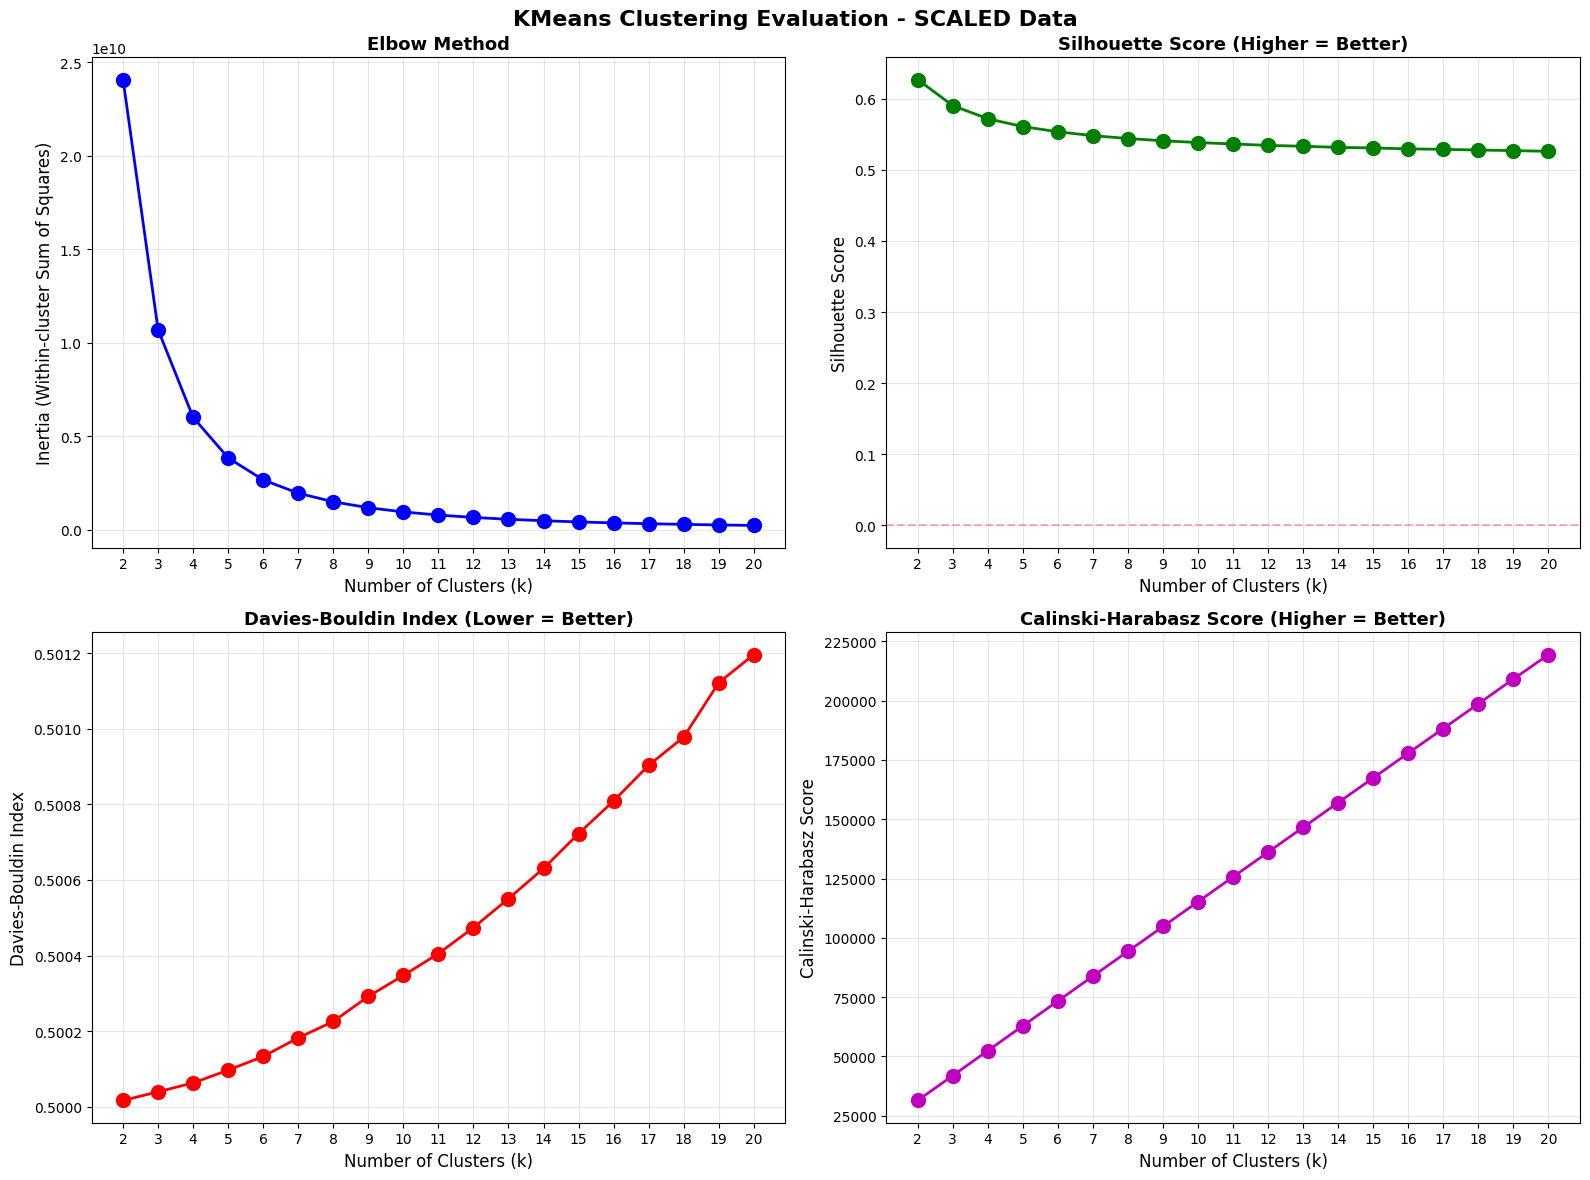

In [40]:
# ============================================================
# STEP 3: Visualize Evaluation Metrics
# ============================================================
print("[Step 3] Visualizing clustering evaluation metrics...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KMeans Clustering Evaluation - SCALED Data', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metrics['n_clusters'], metrics['inertia'], 'bo-', 
               linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics['n_clusters'])

# 2. Silhouette Score
axes[0, 1].plot(metrics['n_clusters'], metrics['silhouette'], 'go-', 
               linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics['n_clusters'])
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index
axes[1, 0].plot(metrics['n_clusters'], metrics['davies_bouldin'], 'ro-', 
               linewidth=2, markersize=10)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics['n_clusters'])

# 4. Calinski-Harabasz Score
axes[1, 1].plot(metrics['n_clusters'], metrics['calinski_harabasz'], 'mo-', 
               linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics['n_clusters'])

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# STEP 4: Recommend Optimal k
# ============================================================
print("\n[Step 4] Recommendations for optimal k:")
print("-" * 70)

# Find best k for each metric
best_silhouette_k = metrics['n_clusters'][np.argmax(metrics['silhouette'])]
best_db_k = metrics['n_clusters'][np.argmin(metrics['davies_bouldin'])]
best_ch_k = metrics['n_clusters'][np.argmax(metrics['calinski_harabasz'])]

print(f"Best k by Silhouette Score: {best_silhouette_k}")
print(f"Best k by Davies-Bouldin Index: {best_db_k}")
print(f"Best k by Calinski-Harabasz Score: {best_ch_k}")

# Calculate elbow using rate of change
inertia_diff = np.diff(metrics['inertia'])
inertia_diff_pct = (inertia_diff / metrics['inertia'][:-1]) * 100
elbow_k = metrics['n_clusters'][np.argmin(np.abs(inertia_diff_pct + 10)) + 1]  # Approximate elbow
print(f"Approximate elbow point: {elbow_k}")



[Step 4] Recommendations for optimal k:
----------------------------------------------------------------------
Best k by Silhouette Score: 2
Best k by Davies-Bouldin Index: 2
Best k by Calinski-Harabasz Score: 20
Approximate elbow point: 19

PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k


In [42]:
# ============================================================
# STEP 5: Apply Final Clustering
# ============================================================

# Prompt for optimal k (you can change this based on the plots)
optimal_k = 7

print(f"\n[Step 5] Applying KMeans with k={optimal_k}...")
print("-" * 70)

# Fit final KMeans model
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=50,  # More initializations for stability
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to dataframe
df_scaled['Cluster'] = cluster_labels

print(f"✓ Clustering complete with k={optimal_k}")

# Calculate final metrics
final_silhouette = silhouette_score(df_scaled.drop(columns='Cluster'), cluster_labels)
final_db = davies_bouldin_score(df_scaled.drop(columns='Cluster'), cluster_labels)
final_ch = calinski_harabasz_score(df_scaled.drop(columns='Cluster'), cluster_labels)

print(f"\nFinal Clustering Metrics:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")




[Step 5] Applying KMeans with k=7...
----------------------------------------------------------------------
✓ Clustering complete with k=7

Final Clustering Metrics:
  Silhouette Score: 0.5480
  Davies-Bouldin Index: 0.5002
  Calinski-Harabasz Score: 83,862.97


In [43]:
# ============================================================
# STEP 6: Analyze Cluster Distribution
# ============================================================
print("\n[Step 6] Cluster distribution analysis...")
print("-" * 70)

cluster_counts = df_scaled['Cluster'].value_counts().sort_index()
cluster_percentages = (df_scaled['Cluster'].value_counts(normalize=True) * 100).sort_index()

print("\nCluster Sizes:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = cluster_percentages[cluster_id]
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.2f}%)")

# Check for imbalanced clusters
min_size = cluster_counts.min()
max_size = cluster_counts.max()
imbalance_ratio = max_size / min_size

print(f"\nCluster Balance:")
print(f"  Largest cluster: {max_size:,} patients")
print(f"  Smallest cluster: {min_size:,} patients")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio >= 2:
    print("  ⚠️  WARNING: Highly imbalanced clusters detected!")
elif imbalance_ratio >= 1.5:
    print("  ⚠️  CAUTION: Moderately imbalanced clusters")
else:
    print("  ✓ Clusters are reasonably balanced")


# ============================================================#
df_scaled.to_csv('clustered_scaled_data.csv', index=False)



[Step 6] Cluster distribution analysis...
----------------------------------------------------------------------

Cluster Sizes:
  Cluster 0: 1,495 patients (14.25%)
  Cluster 1: 1,505 patients (14.34%)
  Cluster 2: 1,504 patients (14.33%)
  Cluster 3: 1,500 patients (14.30%)
  Cluster 4: 1,495 patients (14.25%)
  Cluster 5: 1,493 patients (14.23%)
  Cluster 6: 1,500 patients (14.30%)

Cluster Balance:
  Largest cluster: 1,505 patients
  Smallest cluster: 1,493 patients
  Imbalance ratio: 1.01x
  ✓ Clusters are reasonably balanced


## 🦠 Cluster 1 – Slight elevation in WBC and hepatitis marker

Proofs:

WBC +0.059 z → mild leukocytosis potential.

Has_Hepatitis +0.063 z → higher incidence of hepatitis exposure or prior infection.
Medical definition: This group shows possible immune activation or low-grade inflammation (e.g., mild viral exposure or hepatic stress).
When a new patient maps here, review liver enzymes and infection history.

## 💪 Cluster 2 – Good self-reported health, normal labs

Proofs:

General_health_condition +0.085 z → best perceived health.

Education & Income proxies suggest stable lifestyle; no abnormal lab deviations.
Medical definition: Represents generally healthy individuals with good overall function. Expect normal blood counts, low disease prevalence, and healthy habits.

## ⚠️ Cluster 3 – Lowest health indicators: chronic risk phenotype

Proofs:

General_health_condition −0.411 z (worst).

Income_to_Poverty_Ratio −0.393 z → low access to care.

Education −1.117 z correlates strongly with higher chronic illness rates.
Medical definition: These patients often show chronic comorbid patterns (e.g., hypertension, diabetes, obesity) and lower perceived health.
Incoming patients in this cluster should trigger preventive screening protocols.

## 💉 Cluster 4 – Good general health with strong vaccination coverage

Proofs:

General_health_condition +0.092 z (healthy self-report).

Received_Hepatitis_A_Vaccine +0.063 z → high immunization adherence.

WBC +0.045 z → normal to slightly active immune state.
Medical definition: Indicates health-conscious individuals with good immune protection and low chronic burden.
New patients here likely have complete vaccination history and strong preventive engagement.

## 🩸 Cluster 5 – Mildly lower WBC; fewer chronic disease flags

Proofs:

WBC −0.070 z → possible lower inflammatory activity.

Has_diabetes −0.066 z, Has_Hepatitis −0.066 z → fewer metabolic/liver issues.
Medical definition: Cluster of low inflammatory load and minimal chronic disease.
Incoming patients resemble clinically stable, non-inflammatory profiles.

## ❤️ Cluster 6 – Medically stable and well-maintained

Proofs:

General_health_condition +0.056 z, Income_to_Poverty_Ratio +0.055 z.

Covered_by_health_insurance slightly higher (+0.054 z).
Medical definition: Balanced physiology—no evident disease patterns, regular access to care, likely preventive check-up compliance.
Expect healthy cardiovascular and metabolic parameters.

## 🧬 Cluster 7 – Mildly elevated platelets and WBC: possible inflammatory tendency

Proofs:

Platelete +0.060 z, WBC +0.055 z → mild hematologic elevation.
Medical definition: May represent patients with subclinical inflammation or stress-related hematologic activity (smoking, mild infection, iron imbalance).
New patients in this cluster should undergo CBC follow-up for inflammation markers.

## 🧒 Cluster 8 – Younger, healthy, good hemoglobin

Proofs:

Age −0.050 z → younger demographic.

Haemoglobin +0.049 z → good oxygen-carrying capacity.

General_health_condition +0.062 z → healthy self-report.
Medical definition: Younger healthy group, typically normal labs and low disease risk.
When a new patient maps here, expect normal vitals and no chronic findings.

## 🫀 Cluster 9 – Healthy, well-covered, strong general metrics

Proofs:

General_health_condition +0.058 z, Education_Level +0.122 z.

Covered_by_health_insurance +0.074 z → consistent healthcare access.
Medical definition: Medically stable, low-risk population.
New patients aligned here likely exhibit good clinical health and effective condition management.